## Comparison of NNLS and L2reg

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.globals as gl
import matplotlib.pyplot as plt
from scipy import stats

#### Loading Evaluation of NNLS and L2reg Global Models

In [2]:
methods = ['NNLS', 'L2reg']
train_ds_list = gl.get_ldo_names()
train_ds_list = [ds_code.replace('Ht', '') if 'Ht' in ds_code else ds_code for ds_code in train_ds_list]
eval_ds_list = gl.datasets
eval_ds_names = [ds if gl.sessions[i] == 'all' else ds + gl.sessions[i].split('-')[1] for i, ds in enumerate(gl.datasets)]
df_all = pd.DataFrame()
for i, (ds_code, ds_eval) in enumerate(zip(train_ds_list, eval_ds_names)):
    df = rm.comb_eval(models=[ds_code+"-global-Cavg"],methods=methods,eval_data=[ds_eval],cerebellum='MNISymC3')
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all['logalpha'] = df_all['logalpha'].fillna(-2)

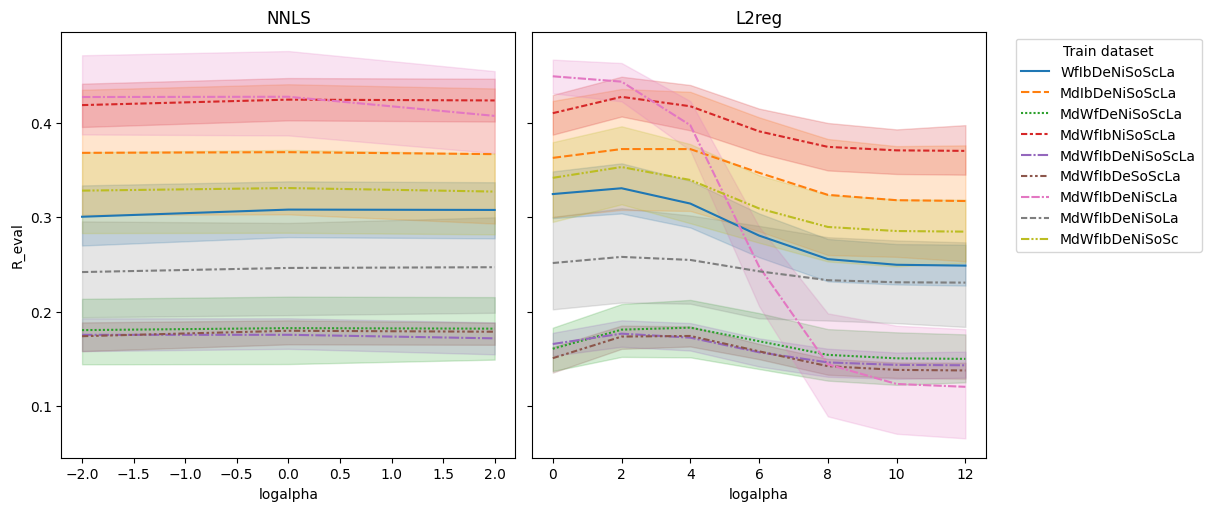

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey='row', constrained_layout=True)
for i, method in enumerate(methods):
    sns.lineplot(data=df_all[df_all['method']==method], y='R_eval', x='logalpha',
                hue='train_dataset', style='train_dataset',
                hue_order=train_ds_list, style_order=train_ds_list, ax=axes[i])
    axes[i].set_title(method)
    if i == 0:
        axes[i].legend_.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Train dataset');
    # plt.xticks([-2, 0, 2], ['None', '0', '2']);

#### Finding best log alpha

In [12]:
for method in methods:
    print(f'\nMethod: {method}')
    df_method = df_all[df_all['method'] == method]
    A = pd.pivot_table(df_method, index=['train_dataset'], columns=['logalpha'], values=['R_eval'], aggfunc='mean').reindex(train_ds_list)
    display(A)
    B = np.nan_to_num(A.values)
    ind = B.argmax(axis=1)
    log_a = np.array(A.columns.get_level_values(1)[ind])
    bestla = pd.DataFrame(log_a, index=A.index, columns=['best_logalpha'])
    display(bestla)
    df_all.loc[df_method.index, 'isbest'] = df_method['logalpha'].values == bestla.loc[df_method['train_dataset']].values.flatten()
df_best = df_all[df_all['isbest']]


Method: NNLS


R_eval                    
logalpha              -2.0       0.0       2.0
train_dataset                                 
WfIbDeNiSoScLa    0.300513  0.308079  0.307723
MdIbDeNiSoScLa    0.368281  0.369002  0.366905
MdWfDeNiSoScLa    0.180266  0.182371  0.181800
MdWfIbNiSoScLa    0.418919  0.424716  0.423860
MdWfIbDeNiSoScLa  0.175261  0.175300  0.171527
MdWfIbDeSoScLa    0.173820  0.179573  0.178564
MdWfIbDeNiScLa    0.427487  0.427773  0.407485
MdWfIbDeNiSoLa    0.241842  0.246207  0.246983
MdWfIbDeNiSoSc    0.328203  0.330947  0.327197

,best_logalpha
train_dataset,
WfIbDeNiSoScLa,0.0
MdIbDeNiSoScLa,0.0
MdWfDeNiSoScLa,0.0
MdWfIbNiSoScLa,0.0
MdWfIbDeNiSoScLa,0.0
MdWfIbDeSoScLa,0.0
MdWfIbDeNiScLa,0.0
MdWfIbDeNiSoLa,2.0
MdWfIbDeNiSoSc,0.0



Method: L2reg


R_eval                                                    \
logalpha              0.0       2.0       4.0       6.0       8.0       10.0   
train_dataset                                                                  
WfIbDeNiSoScLa    0.324566  0.330729  0.314476  0.280534  0.255571  0.249565   
MdIbDeNiSoScLa    0.362948  0.372299  0.372277  0.347143  0.323711  0.318051   
MdWfDeNiSoScLa    0.160485  0.180751  0.182874  0.168494  0.154007  0.150330   
MdWfIbNiSoScLa    0.410359  0.427682  0.417695  0.391096  0.374621  0.370917   
MdWfIbDeNiSoScLa  0.165545  0.176506  0.172291  0.156758  0.146009  0.143377   
MdWfIbDeSoScLa    0.150509  0.173428  0.174064  0.157756  0.142036  0.138079   
MdWfIbDeNiScLa    0.449478  0.443805  0.397543  0.247640  0.144021  0.123136   
MdWfIbDeNiSoLa    0.251424  0.257930  0.254693  0.242630  0.233207  0.230979   
MdWfIbDeNiSoSc    0.341770  0.353239  0.339498  0.309299  0.289670  0.285351   

                            
logalpha              12.0  
train_dataset               
WfIbDeNiSoScLa    0.248663  
MdIbDeNiSoScLa    0.317202  
MdWfDeNiSoScLa    0.149773  
MdWfIbNiSoScLa    0.370364  
MdWfIbDeNiSoScLa  0.142976  
MdWfIbDeSoScLa    0.137480  
MdWfIbDeNiScLa    0.120140  
MdWfIbDeNiSoLa    0.230646  
MdWfIbDeNiSoSc    0.284714

,best_logalpha
train_dataset,
WfIbDeNiSoScLa,2.0
MdIbDeNiSoScLa,2.0
MdWfDeNiSoScLa,4.0
MdWfIbNiSoScLa,2.0
MdWfIbDeNiSoScLa,2.0
MdWfIbDeSoScLa,4.0
MdWfIbDeNiScLa,0.0
MdWfIbDeNiSoLa,2.0
MdWfIbDeNiSoSc,2.0


#### Statistical Test for Method Comparison

In [ ]:
alpha = 0.05
for dataset, group in df_best.groupby("train_dataset"):
    # Reshape into subject × method table
    pivot = group.pivot(index="eval_subj", columns="method", values="R_eval")
    pivot = pivot.dropna()

    # Paired t-test (two-sided)
    stat, p = stats.ttest_rel(pivot[methods[0]], pivot[methods[1]], alternative="two-sided")

    # Report results
    mean_A = pivot[methods[0]].mean()
    mean_B = pivot[methods[1]].mean()
    mean_diff = (pivot[methods[0]] - pivot[methods[1]]).mean()

    if p < alpha:
        if mean_diff > 0:
            conclusion = f"{methods[0]} is significantly greater than {methods[1]}"
        else:
            conclusion = f"{methods[1]} is significantly greater than {methods[0]}"
    else:
        conclusion = "No significant difference"

    print(f"Dataset: {dataset}")
    print(f"  mean({methods[0]}) = {mean_A:.3f}, mean({methods[1]}) = {mean_B:.3f}")
    # print(f"  mean({methods[0]}-{methods[1]}) = {mean_diff:.3f}")
    print(f"  t-stat = {stat:.3f}, p = {p:.3g} → {conclusion}\n")

Dataset: MdIbDeNiSoScLa
  mean(NNLS) = 0.369, mean(L2reg) = 0.372
  t-stat = -0.432, p = 0.672 → No significant difference

Dataset: MdWfDeNiSoScLa
  mean(NNLS) = 0.182, mean(L2reg) = 0.183
  t-stat = -0.099, p = 0.923 → No significant difference

Dataset: MdWfIbDeNiScLa
  mean(NNLS) = 0.428, mean(L2reg) = 0.449
  t-stat = -1.067, p = 0.321 → No significant difference

Dataset: MdWfIbDeNiSoLa
  mean(NNLS) = 0.247, mean(L2reg) = 0.258
  t-stat = -2.254, p = 0.035 → L2reg is significantly greater than NNLS

Dataset: MdWfIbDeNiSoSc
  mean(NNLS) = 0.331, mean(L2reg) = 0.353
  t-stat = -2.829, p = 0.0121 → L2reg is significantly greater than NNLS

Dataset: MdWfIbDeNiSoScLa
  mean(NNLS) = 0.175, mean(L2reg) = 0.177
  t-stat = -0.226, p = 0.822 → No significant difference

Dataset: MdWfIbDeSoScLa
  mean(NNLS) = 0.180, mean(L2reg) = 0.174
  t-stat = 0.642, p = 0.549 → No significant difference

Dataset: MdWfIbNiSoScLa
  mean(NNLS) = 0.425, mean(L2reg) = 0.428
  t-stat = -1.679, p = 0.102 → No 

#### Overall test

In [23]:
pivot = df_best.pivot(index=["train_dataset", "eval_subj"], 
                      columns="method", values="R_eval")
pivot = pivot.dropna()

# test across all datasets/subjects
stat, p = stats.ttest_rel(pivot[methods[0]], pivot[methods[1]], alternative="two-sided")

mean_diff = diff.mean()
if p < 0.05:
    if mean_diff > 0:
        conclusion = f"{methods[0]} is significantly greater than {methods[1]} (across all datasets)"
    else:
        conclusion = f"{methods[1]} is significantly greater than {methods[0]} (across all datasets)"
else:
    conclusion = "No significant difference across all datasets"

print(f"Overall mean({methods[0]} - {methods[1]}) = {mean_diff:.3f}")
print(f"t = {stat:.3f}, p = {p:.3g} → {conclusion}")

Overall mean(NNLS - L2reg) = -0.008
t = -3.602, p = 0.000403 → L2reg is significantly greater than NNLS (across all datasets)
